# Refinement of the Step Size of the Numerical Scheme

_Kevin Siswandi | May 2020_

In Multistep Neural Network, training is done to find the optimal parameters via minimising loss function:

$$ \arg \min_w \frac{1}{N - M + 1} \sum_{n = M}^{N} |\textbf{y}_n|^2 $$

where N is the number of data points and M multi steps. The linear difference/residual operator is defined as

$$ \textbf{y}_n = \sum_{n=0}^M \left(\alpha_m x_{n-m} + h \beta_m \textbf{f}(\textbf{x}_{n-m}) \right)$$

for $n=M,...,N$. Now, which step size to use is problem-dependent and hence needs to be tuned for performance.

In [1]:
import numpy as np
from model import lmmNet
from train import *
from predict import *
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import timeit

In [2]:
# specify the settings for the bier data

t0, T, h = 0, 500, 0.2 #seconds
x0 = np.array([4, 3]) #initial conditions: ATP = 4, G = 3 -- default Bier model
params = {'Vin': 0.36, 'k1': 0.02, 'kp':4, 'km':15} # damped oscillation
f_bier = lambda x, t: bier(x, t, params)

To optimize for the step size, we perform a grid search on candidate step sizes.

In [11]:
h_list = [0.3, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2] # list of step sizes to try

hidden_layer_units = 256 # number of units for the hidden layer
M = 1 # number of steps
scheme = 'AM' # LMM scheme

time_points, data = create_training_data(t0, T, h, f_bier, x0)
data.shape

TensorShape([1, 2500, 2])

## 1. Refinement -- Epochs

Text(0.5, 1.0, 'Predicted Trajectories of 2D Yeast Glycolytic Oscillator')

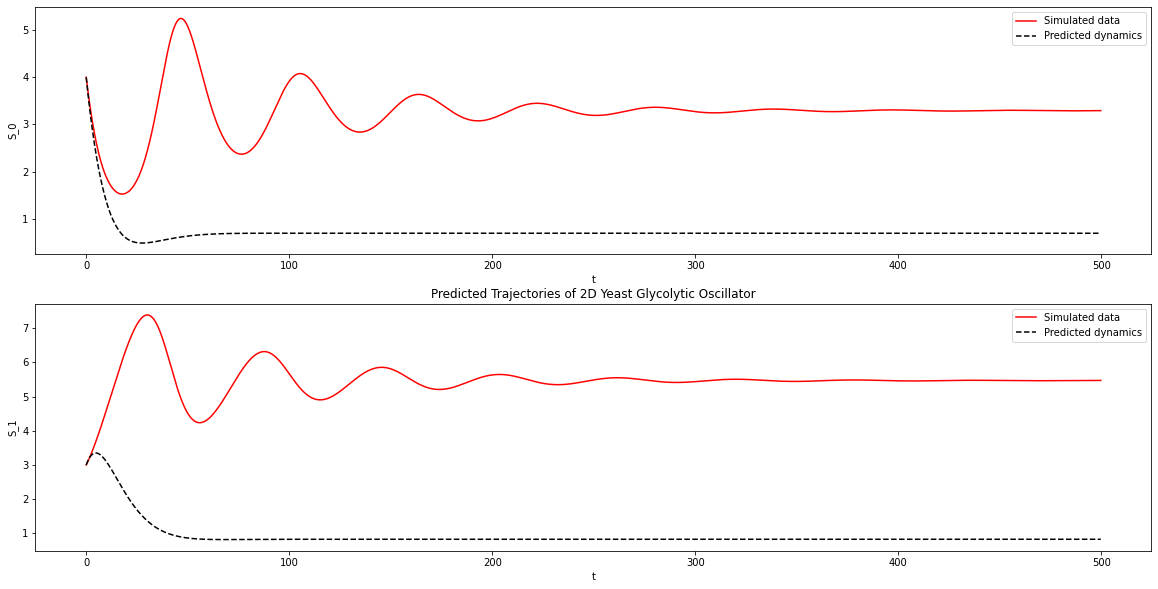

In [4]:
# test if it works for 5 epochs
net = lmmNet(h, data, M, scheme, hidden_layer_units)
N_Iter = 5
net.train(N_Iter)
pred = odeint(predict_fn, x0, time_points, args=(net,))

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, data[0, :, species], 'r-', label='Simulated data')
    plt.plot(time_points, pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Predicted Trajectories of 2D Yeast Glycolytic Oscillator')


Text(0.5, 1.0, 'Predicted Trajectories of 2D Yeast Glycolytic Oscillator')

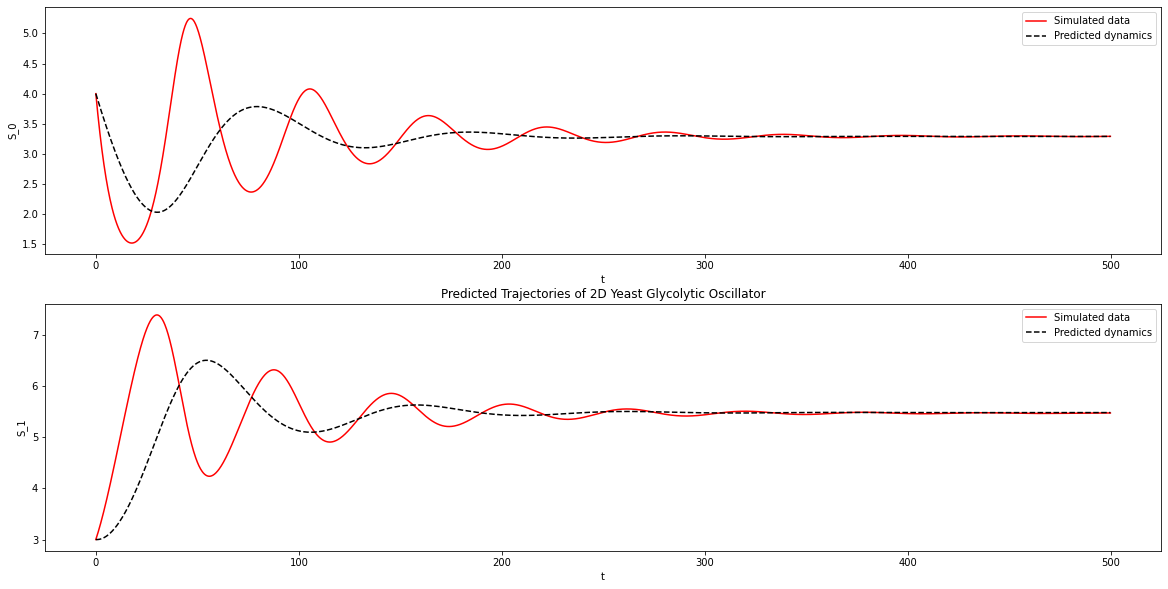

In [5]:
# test for 100 epochs

net = lmmNet(h, data, M, scheme, hidden_layer_units)
N_Iter = 100
net.train(N_Iter)
pred = odeint(predict_fn, x0, time_points, args=(net,))

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, data[0, :, species], 'r-', label='Simulated data')
    plt.plot(time_points, pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Predicted Trajectories of 2D Yeast Glycolytic Oscillator')


Text(0.5, 1.0, 'Predicted Trajectories of 2D Yeast Glycolytic Oscillator')

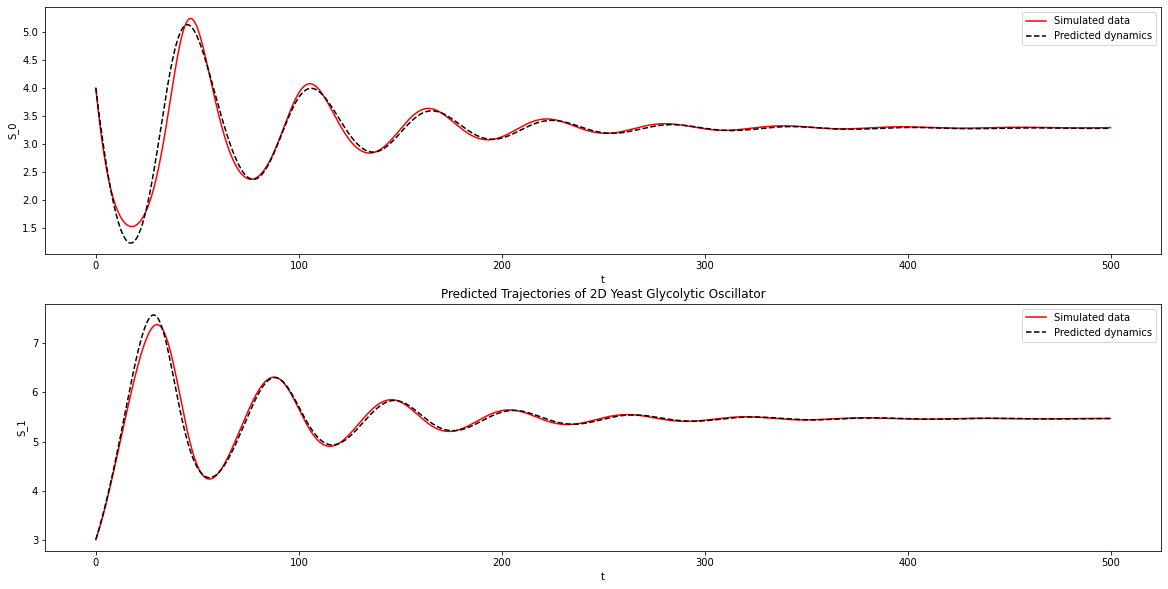

In [7]:
# test for 1000 epochs

net = lmmNet(h, data, M, scheme, hidden_layer_units)
N_Iter = 1000
net.train(N_Iter)
pred = odeint(predict_fn, x0, time_points, args=(net,))

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, data[0, :, species], 'r-', label='Simulated data')
    plt.plot(time_points, pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Predicted Trajectories of 2D Yeast Glycolytic Oscillator')


Text(0.5, 1.0, 'Predicted Trajectories of 2D Yeast Glycolytic Oscillator')

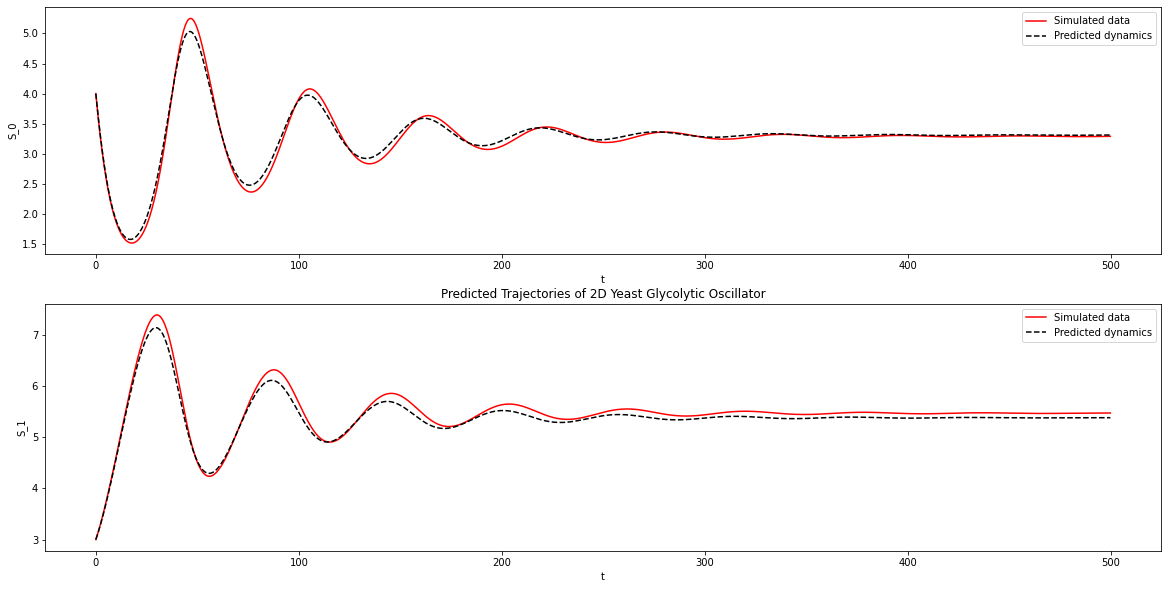

In [8]:
# test for 10000 epochs

net = lmmNet(h, data, M, scheme, hidden_layer_units)
N_Iter = 10000
net.train(N_Iter)
pred = odeint(predict_fn, x0, time_points, args=(net,))

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, data[0, :, species], 'r-', label='Simulated data')
    plt.plot(time_points, pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Predicted Trajectories of 2D Yeast Glycolytic Oscillator')


## 2. Refinement -- Step Size

In [12]:
result_dict = {}
for h in h_list:
    print('Training for step size = ', h)
    net = lmmNet(h, data, M, scheme, hidden_layer_units)
    N_Iter = 10000
    net.train(N_Iter)
    pred = odeint(predict_fn, x0, time_points, args=(net,))
    
    result_dict[h] = pred
    #result_dict['f_pred'] = [ml_f(x, None, model) for x in data]

Training for step size =  0.3
Training for step size =  0.2
Training for step size =  0.4
Training for step size =  0.5
Training for step size =  0.6
Training for step size =  0.7
Training for step size =  0.8
Training for step size =  0.9
Training for step size =  1.0
Training for step size =  1.1
Training for step size =  1.2


In [13]:
def compute_MSE(pred, data, index):
    pred_array = np.array(pred)
    data = np.squeeze(data)
    return np.linalg.norm(data[:,index] - pred_array[:,index], 2)/np.linalg.norm(data[:,index], 2)

In [15]:
error1_list = [compute_MSE(result_dict[h], data, 0) for h in result_dict]
error2_list = [compute_MSE(result_dict[h], data, 1) for h in result_dict]

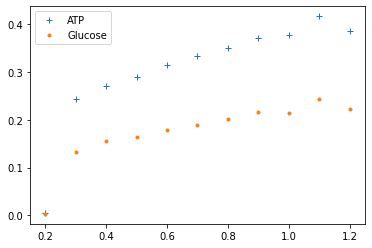

In [23]:
plt.plot(h_list, error1_list, '+', label='ATP')
plt.plot(h_list, error2_list, '.', label='Glucose')
plt.legend()